In [63]:
#importo lbirerias

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from statsmodels.graphics.mosaicplot import mosaic
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
#creo df nuevos con los archivos leidos

df_homicidios = pd.read_excel('homicidios.xlsx', engine='openpyxl') 

In [4]:
df_homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


## PROCEDO A HACER UNA LIMPIEZA BREVE DEL DATASET DE HOMICIDIOS Y SU RESPECTIVO ANALISIS

In [5]:
#convierto todas las columnas para que esten en minuscula 

df_homicidios.columns = df_homicidios.columns.str.lower()

In [6]:
#convierto valores NaN a tipo str 'Sin Dato' y valores numericos a float
df_homicidios['altura'] = np.where(df_homicidios['altura'].isna(), 'Sin Dato', df_homicidios['altura'].astype(float))
df_homicidios['cruce'].fillna('Sin Dato', inplace=True)
df_homicidios['acusado'].replace('SD', 'Sin Dato', inplace=True)

In [7]:
df_homicidios = df_homicidios.rename(columns={'aaaa': 'año',
                              'mm' : 'mes',    #reemplazo nombre de las columnas para entenderlas mejor
                            'dd' : 'dia',})

In [8]:
df_homicidios.drop('hora', axis=1, inplace=True)

In [9]:
df_homicidios['hh'].apply(type).value_counts()
df_homicidios[df_homicidios['hh'].apply(type) == str]


,id,n_victimas,fecha,año,mes,dia,hh,lugar_del_hecho,tipo_de_calle,calle,altura,cruce,dirección normalizada,comuna,xy (caba),pos x,pos y,participantes,victima,acusado
518,2019-0103,1,2019-12-18,2019,12,18,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",Sin Dato,GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


In [10]:
moda_hh = df_homicidios['hh'].mode().iloc[0]


In [11]:
# Reemplaza las filas donde 'HH' es de tipo str con la moda calculada
df_homicidios.loc[df_homicidios['hh'].apply(type) == str, 'hh'] = moda_hh

In [12]:
df_homicidios.head(1)

,id,n_victimas,fecha,año,mes,dia,hh,lugar_del_hecho,tipo_de_calle,calle,altura,cruce,dirección normalizada,comuna,xy (caba),pos x,pos y,participantes,victima,acusado
0,2016-0001,1,2016-01-01,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,Sin Dato,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO


In [13]:
df_homicidios.head()

,id,n_victimas,fecha,año,mes,dia,hh,lugar_del_hecho,tipo_de_calle,calle,altura,cruce,dirección normalizada,comuna,xy (caba),pos x,pos y,participantes,victima,acusado
0,2016-0001,1,2016-01-01,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,Sin Dato,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",Sin Dato,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,Sin Dato,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,Sin Dato,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,Sin Dato
4,2016-0005,1,2016-01-21,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,Sin Dato,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [14]:
#debido al analisis que estoy haciendo procedo a crear una funcion que me pase los valores de la columna hh a 
#una nueva columna (franja_hora) en formato str.

def franja_hor(value):
    if isinstance(value, int):  #si es un entero
        hour = value
    elif isinstance(value, dt.time):  #si es un objeto datetime.time
        hour = value.hour
    else:  #para cualquier otro tipo de dato como None
        return 'Sin Datos'
    
    if 0 <= hour < 6:
        return 'Madrugada (0-5)'
    elif 6 <= hour < 12:
        return 'Mañana (6-11)'
    elif 12 <= hour < 18:
        return 'Tarde (12-17)'
    else:
        return 'Noche (18-23)'

df_homicidios['franja_hora'] = df_homicidios['hh'].apply(franja_hor)


In [15]:
#realizo una visualizacion de la cantidad de accidentes que hubo por año hasta la fecha
año = df_homicidios.groupby('año').size()

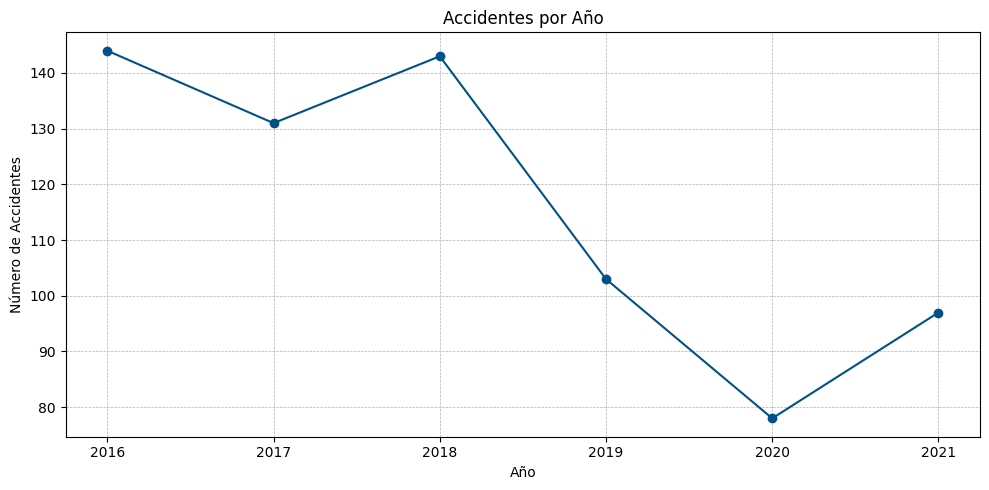

In [16]:
colores_pastel = ['#005187', '#336ca5', '#5589c4', '#74a7e4', '#98c0f6', '#bbd5f9']

plt.figure(figsize=(10,5))
año.plot(kind='line', marker='o', linestyle='-', color=colores_pastel)
plt.title('Accidentes por Año')
plt.ylabel('Número de Accidentes')
plt.xlabel('Año')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(list(año.index))  # muestro todos los años en el eje x
plt.tight_layout()
plt.show()

##### en el grafico se puede apreciar que el pico maximo de accidentes que hubo por año fue para el 2016, donde se puede ver que se registraron casi 145 accidentes, llegando al punto mas bajo en el año 2020, con esto puedo deducir que ese año debido a la pandemia que hubo, se registraron menos cantidad ya que no se podia circular en la via publica.

<Axes: title={'center': 'Accidentes por franja horaria'}, xlabel='franja_hora'>

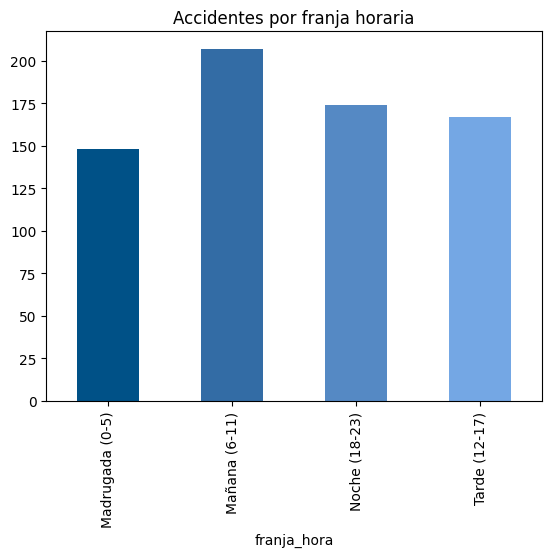

In [17]:
#verifico en que horarios frecuentan mas los accidentes

df_homicidios['franja_hora'].value_counts().sort_index().plot(kind='bar', title='Accidentes por franja horaria', color=colores_pastel)


#### en el siguiente grafico podemos verificar que la mayoria de los accidentes mas recurrentes suelen suceder en la franja horaria de la mañana, en base a esto algunas cosas que puedo deducir esque se producen en ese horario ya que es cuando la gente esta por entrar a trabajar, llevando a sus hijos al colegio.

In [18]:
#creo un grafico para verificar la cantidad de victimas y que tipo de vehiculo se ve mas afectado en estos incidentes
victimas = df_homicidios.groupby('victima')['n_victimas'].sum().reset_index()


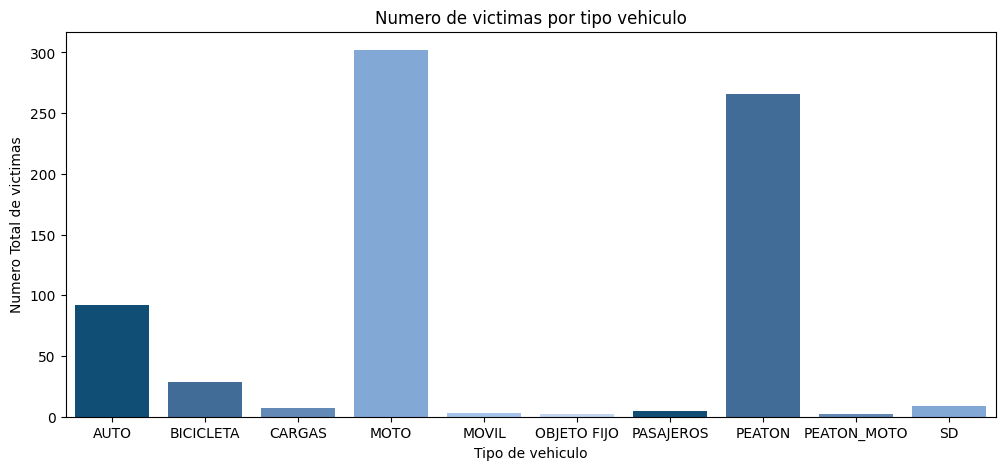

In [19]:
plt.figure(figsize=(12,5))
sns.barplot(x='victima', y='n_victimas', data=victimas, palette=colores_pastel)
plt.title('Numero de victimas por tipo vehiculo')
plt.ylabel('Numero Total de victimas')
plt.xlabel('Tipo de vehiculo')
plt.show()

##### podemos corroborar que el mayor numero de victimas implicadas en accidentes de transito se movilizan en motocileta, esto puede deberse a varias cosas desde mi punto de vista, exceso de velocidad, poco respeto a los semaforos.

In [20]:
accidentes_por_direccion = df_homicidios.groupby('tipo_de_calle').size().reset_index(name='cantidad_accidentes')

In [21]:
accidentes_por_direccion

,tipo_de_calle,cantidad_accidentes
0,AUTOPISTA,66
1,AVENIDA,429
2,CALLE,136
3,GRAL PAZ,65


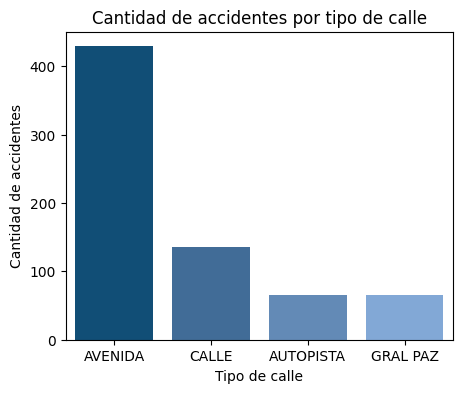

In [22]:
#creo un cuadro para visualizar la cantidad de accidentes por tipo de calle
plt.figure(figsize=(5,4))
sns.barplot(x='tipo_de_calle', y='cantidad_accidentes', data=accidentes_por_direccion.sort_values('cantidad_accidentes', ascending=False), palette=colores_pastel)
plt.title('Cantidad de accidentes por tipo de calle')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Tipo de calle')
plt.show()

#### al examinar el grafico, podemos darnos cuenta que los accidentes viales en las avenidas son mas reccurentes, con un pico de llegada de casi 430 accidentes, esto puede deberse a que en estas, son una de las mayores vias de traficos mas concurridas y al haber mucho englomeramiento de vehiculos hay mas probabilidades de que se produzca un accidente.

In [23]:
df_homicidios.head(1)

,id,n_victimas,fecha,año,mes,dia,hh,lugar_del_hecho,tipo_de_calle,calle,...,cruce,dirección normalizada,comuna,xy (caba),pos x,pos y,participantes,victima,acusado,franja_hora
0,2016-0001,1,2016-01-01,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,Madrugada (0-5)


In [24]:
#numero promedio de victimas por accidentes
promedio_victimas = df_homicidios['n_victimas'].mean()
print(f"El número promedio de víctimas por accidente es: {promedio_victimas:.2}")

El número promedio de víctimas por accidente es: 1.0


#### visualizamos que en promedio el numero de victimas por accidente de transito suele ser 1

In [25]:
#comunas con el mayor numero de victimas promedio
comunas_promedio = df_homicidios.groupby('comuna')['n_victimas'].mean().sort_values(ascending=False)
print(comunas_promedio)
#se puede apreciar que en promedio por comuna tambien es 1 el numero de victimas

comuna
14    1.057143
12    1.054054
6     1.047619
4     1.039474
10    1.034483
1     1.033333
7     1.033333
11    1.031250
8     1.030769
9     1.027397
15    1.022727
3     1.022222
0     1.000000
2     1.000000
5     1.000000
13    1.000000
Name: n_victimas, dtype: float64


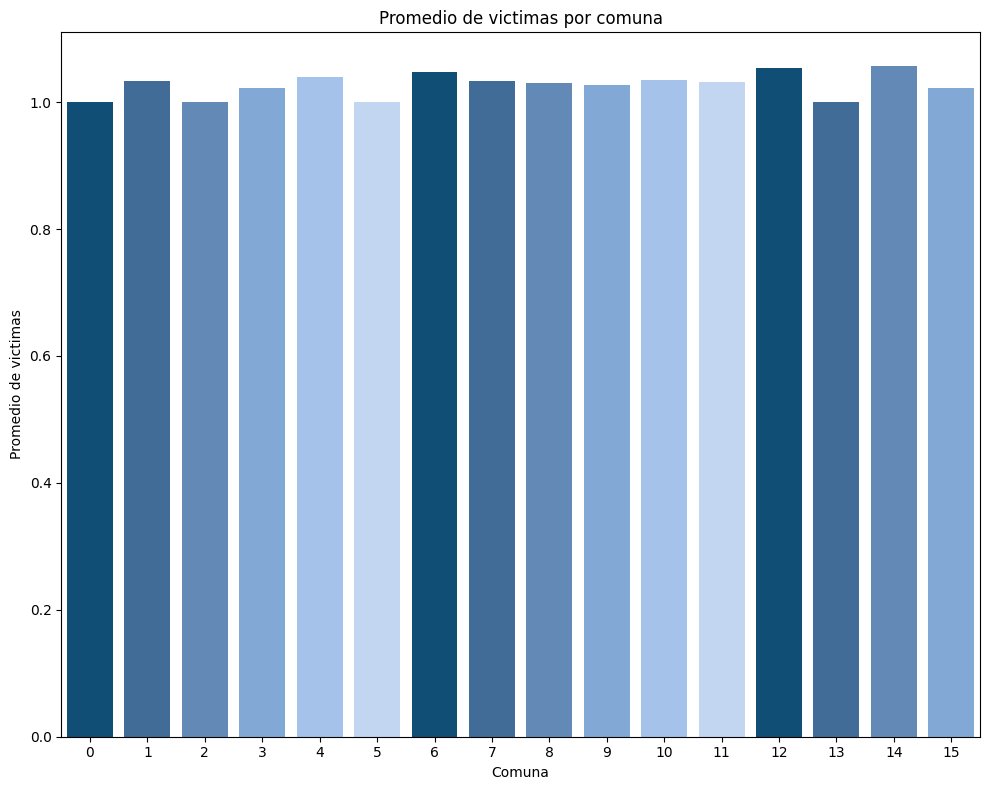

In [26]:

plt.figure(figsize=(10, 8))
sns.barplot(x=comunas_promedio.index, y=comunas_promedio.values, palette=colores_pastel)
plt.title("Promedio de victimas por comuna")
plt.ylabel("Promedio de victimas")
plt.xlabel("Comuna")
plt.tight_layout()
plt.show()

In [27]:
accidentes_por_mes = df_homicidios.groupby('mes').size()


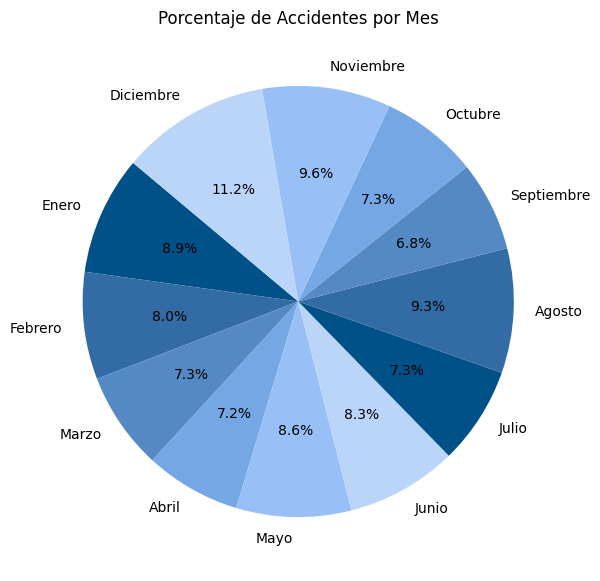

In [28]:
 
plt.figure(figsize=(7, 7))
accidentes_por_mes.plot(kind='pie', labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], 
                        autopct='%1.1f%%',  #muestra el porcentaje en el gráfico
                        startangle=140, 
                        colors=colores_pastel) 

plt.title('Porcentaje de Accidentes por Mes')
plt.show()

#### el analisis de los datos de accidentes viales por mes revela que diciembre registra el mayor numero de incidentes en comparacion con los otros meses del año, esto puede deberse a varios factores que hay que tener en cuenta, como lo son las fechas festivas, ya que en este año se celebra navidad, año nuevo y la mayoria de las veces el implicado incumple con la ley y maneja alcohozilado, tambien hay que tener en cuenta que es un mes de vacaciones escolares por lo tanto mucha gente viaja a vacacionar lo que genera gran flujo vehicular.

In [29]:
df_homicidios.to_csv('homicidios.csv', index=False)

In [34]:
df_homicidios_2 = pd.read_excel('homicidios.xlsx', sheet_name=2)

In [35]:
df_homicidios_2

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [44]:
df_homicidios_2.nunique()

ID_hecho               696
FECHA                  598
AAAA                     6
MM                      12
DD                      31
ROL                      5
VICTIMA                  8
SEXO                     3
EDAD                    86
FECHA_FALLECIMIENTO    563
dtype: int64

In [45]:
df_homicidios_2.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [55]:
df_homiciods_final = pd.merge(df_homicidios, df_homicidios_2, left_on='id', right_on='ID_hecho', how='inner')

In [56]:
df_homiciods_final

,id,n_victimas,fecha,año,mes,dia,hh,lugar_del_hecho,tipo_de_calle,calle,...,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,...,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",...,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,...,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,...,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,...,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,...,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",...,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,...,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",...,2021-0096,2021-12-15,2021,12,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00


In [59]:
df_homiciods_final = df_homiciods_final.drop(columns=['AAAA', 'MM', 'DD', 'ID_hecho', 'FECHA'])

In [60]:
df_homiciods_final.columns

Index(['id', 'n_victimas', 'fecha', 'año', 'mes', 'dia', 'hh',
       'lugar_del_hecho', 'tipo_de_calle', 'calle', 'altura', 'cruce',
       'dirección normalizada', 'comuna', 'xy (caba)', 'pos x', 'pos y',
       'participantes', 'victima', 'acusado', 'franja_hora', 'ROL', 'VICTIMA',
       'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [61]:
df_homiciods_final.to_csv('homicidios_final.csv', index=False)